### An example script to represent the 2-dimensional bin packing problem

In [77]:
#!pip3 install networkx matplotlib numpy h5py

In [78]:
#!pip3 install torch --index-url https://download.pytorch.org/whl/cu126
#!pip3 install torch_geometric

In [79]:
import torch
import matplotlib.pyplot as plt

from torch_geometric.loader import DataLoader
from matplotlib.patches import Rectangle
from tqdm import tqdm

from model import BinPackingGAT
from dataset import BinPacking2D, BinPackingGraph

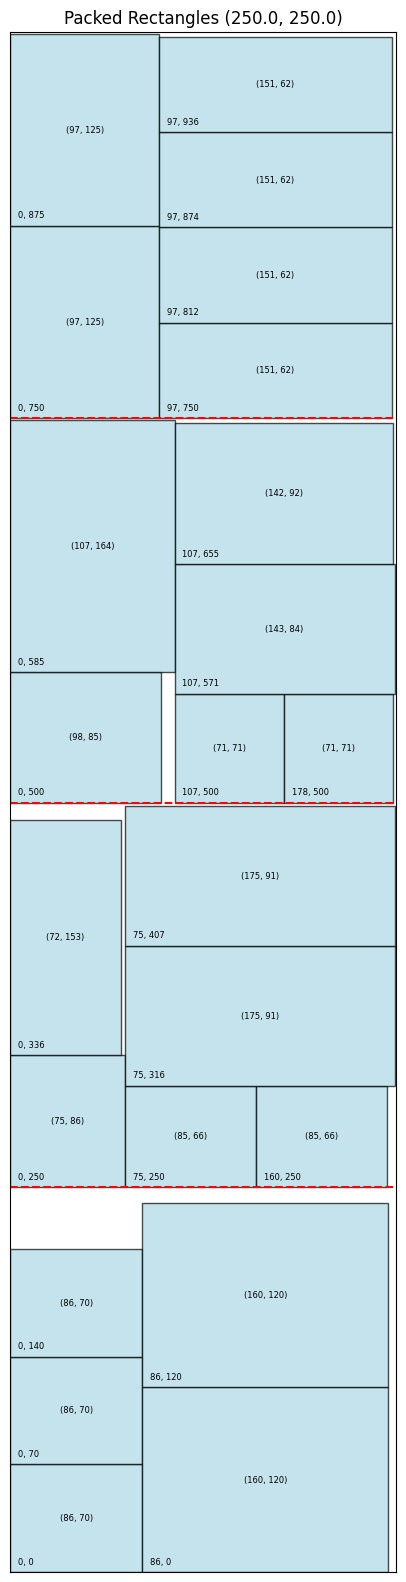

In [80]:
dataset = []
file_path = "data/gcut/dataset.txt"

with open(file_path, 'r') as f:
    current_set = []
    for line in f:
        values = list(map(float, line.split()))
        if len(values) == 3:
            if current_set:
                dataset.append(current_set)
            current_set = [values]
        elif values:
            current_set.append(values)
    if current_set:
        dataset.append(current_set)

for set in dataset:
    fig, ax = plt.subplots(figsize=(12, 6))
    n_bins, x_size, y_size = set[0]
    n_bins = int(n_bins)

    for i, (w, h, x, y) in enumerate(set[1:]):
        rect = Rectangle((x, y), w, h, linewidth=1, edgecolor='black', facecolor='lightblue', alpha=0.7)
        ax.add_patch(rect)

        if x == int(x): x = int(x)
        if y == int(y): y = int(y)
        if w == int(w): w = int(w)
        if h == int(h): h = int(h)
        ax.text(x + w / 2, y + h / 2, f'({w}, {h})', fontsize=6, ha='center', va='center', color='black')
        ax.text(x + 5, y + 5, f'{x}, {y}', fontsize=6, color='black')
    
    for i in range(1, n_bins, 1):
        plt.axhline(y = y_size * i, color = 'r', linestyle = 'dashed')

    ax.set_xlim(0, max(x + w for w, _, x, _ in set[1:]) + 1)
    ax.set_ylim(0, max(y + h for _, h, _, y in set[1:]) + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Packed Rectangles ({x_size}, {y_size})")
    ax.set_aspect('equal')

    fig.set_size_inches(5, 5 * n_bins)

    plt.show()
    plt.close()

    break

In [ ]:
n_epochs   = 1000
batch_size = 1
lr         = 1e-5

in_channels     = 4
hidden_channels = 32
out_channels    = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [82]:
dataset = BinPacking2D("data/gcut/dataset.txt")
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [83]:
model = BinPackingGAT(in_channels, hidden_channels, out_channels).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.MSELoss()

In [84]:
# def train(model, loader, optimizer, criterion, n_epochs=n_epochs):
model.train()
for epoch in range(n_epochs):
    total_loss = 0
    progress_bar = tqdm(loader)

    for i, (labels, inputs) in enumerate(progress_bar):
        labels = labels.to(device)
        inputs = inputs.to(device)

        predictions = model(inputs)

        loss = criterion(predictions, labels.x[:, :2])
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        progress_bar.set_postfix(epoch=epoch, loss=total_loss/(i+1))

100%|██████████| 8/8 [00:00<00:00, 82.69it/s, epoch=99, loss=0.0922]
